# Medical Information Extraction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk


In [2]:
train_data = pd.read_csv('train_medical.csv')
test_data = pd.read_csv('test_medical.csv')
validation_data = pd.read_csv('validation_medical.csv')

In [3]:
print("No of rows in the training set : " , train_data.shape)
print("No of rows in the test set : " , test_data.shape)

No of rows in the training set :  (13340, 25)
No of rows in the test set :  (4566, 25)


In [4]:
train_data.head(2)

,_unit_id,_created_at,_canary,_id,_started_at,_channel,_trust,_worker_id,_country,_region,...,direction_gold,e1,e2,relation,relex_relcos,sent_id,sentence,term1,term2,twrex
0,502808352,7/13/2014 13:48:35,NaN,1321892767,7/13/2014 13:48:14,clixsense,0.9167,27871219,NLD,07,...,NaN,69,142,treats,1.0,907845-FS1-2,"For treatment of uncomplicated cervical, URETH...",URETHRAL OR RECTAL GONORRHEA,IM CEFTRIAXONE,RO-may_treat
1,502808352,7/13/2014 13:51:12,NaN,1321894040,7/13/2014 13:51:07,neodev,0.8333,17610000,GBR,I2,...,NaN,69,142,treats,1.0,907845-FS1-2,"For treatment of uncomplicated cervical, URETH...",URETHRAL OR RECTAL GONORRHEA,IM CEFTRIAXONE,RO-may_treat


# Dropping irrelevant columns
   
   Columns that are dropped are : _unit_id , _created_at, _canary ,  _id ,  _started_at ,  _channel ,
       _trust ,  _worker_id ,  _country ,  _region , _city , _ip ,
        direction , b1 , b2 , direction_gold , e1 ,  e2,
       relex_relcos , sent_id , twrex , term1 ,  term2
   
   After dropping the above columns we are left with columns : 'sentence' and 'relation'


In [5]:
#dropping irrelevant columns
columns_to_drop = ['_unit_id', '_created_at', '_canary', '_id', '_started_at', '_channel',
       '_trust', '_worker_id', '_country', '_region', '_city', '_ip',
       'direction', 'b1', 'b2', 'direction_gold', 'e1', 'e2',
       'relex_relcos', 'sent_id', 'twrex', 'term1' , 'term2']


train_data = train_data.drop( columns_to_drop , axis = 1)
test_data = test_data.drop(columns_to_drop , axis = 1)
validation_data = validation_data.drop(columns_to_drop , axis = 1)


print("Shape of training set : " , train_data.shape)
print("Shape of test set : " , test_data.shape)
print("Shape of validation set : " , validation_data.shape)

Shape of training set :  (13340, 2)
Shape of test set :  (4566, 2)
Shape of validation set :  (4270, 2)


# The Classes present in the Dataset 
    1. causes
    2. treats 
    3. is location of
    4. diagnosed by
    5. contraindicates
    6. is diagnosed by
    7. location of 
    8. diagnosed by test or drug
    9. location


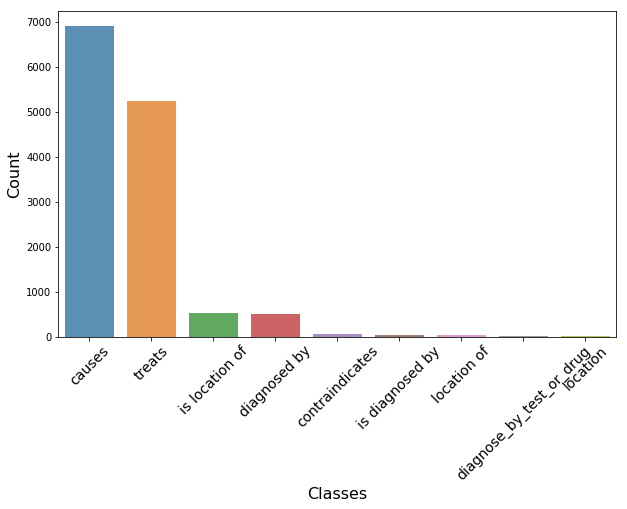

In [6]:
count_classes = train_data['relation'].value_counts()
x = [ i for i in range( len(count_classes.index) )]

plt.figure(figsize = ( 10 , 6 ) )
sns.barplot(count_classes.index , count_classes.values , alpha = 0.8)
plt.ylabel('Count' , fontsize = 16 )
plt.xlabel('Classes' , fontsize = 16 )
plt.xticks( x , count_classes.index , fontsize = 14 , rotation = 45)
plt.show()

# Reducing the number of classes to 3. 
   1. causes 
   2. treats
   3. others

In [7]:
train_data.loc[train_data.relation == 'is location of' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'diagnosed by' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'contraindicates' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'location' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'location of' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'diagnose_by_test_or_drug' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'is diagnosed by' , 'relation'] = 'Others'

test_data.loc[test_data.relation == 'is location of' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'diagnosed by' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'contraindicates' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'location' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'location of' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'diagnose_by_test_or_drug' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'is diagnosed by' , 'relation'] = 'Others'




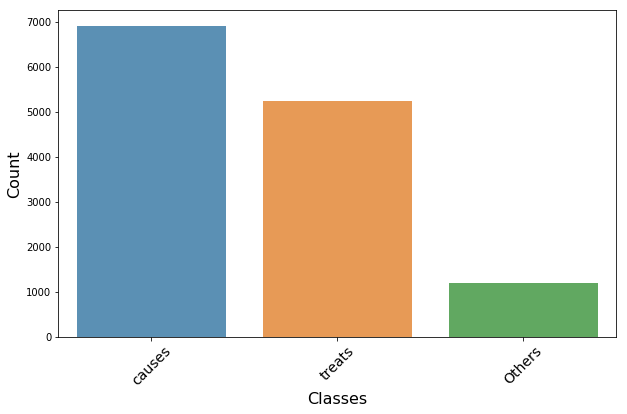

In [8]:
count_classes = train_data['relation'].value_counts()
x = [ i for i in range( len(count_classes.index) )]

plt.figure(figsize = ( 10 , 6 ) )
sns.barplot(count_classes.index , count_classes.values , alpha = 0.8)
plt.ylabel('Count' , fontsize = 16 )
plt.xlabel('Classes' , fontsize = 16 )
plt.xticks( x , count_classes.index , fontsize = 14 , rotation = 45)
plt.show()

In [9]:
target = train_data['relation']
train_data = train_data.drop('relation' , axis = 1)

ground_truth = test_data['relation']
test_data = test_data.drop('relation' , axis = 1)

# Text preprocessing

In [10]:
import re
import numpy as np

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')

def text_prepare(doc):
    
    doc = REPLACE_BY_SPACE_RE.sub(' ' , doc)
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [11]:
train_data = [ text_prepare(x) for x in train_data['sentence']]
test_data = [ text_prepare(x) for x in test_data['sentence']]

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english',min_df = 5 , max_df = 0.9, ngram_range=(1,3))
X_train = tfidf_vectorizer.fit_transform(train_data)
X_test = tfidf_vectorizer.transform(test_data)

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
target = encoder.fit_transform(target)
target_test = encoder.fit_transform(ground_truth)

In [16]:
y_train = target
y_test = target_test


In [17]:
# Checking the dimensions finally
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(13340, 51900) (4566, 51900)
(13340,) (4566,)


## Checking Different classifiers


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [21]:
classifiers = [ MultinomialNB(alpha=1.0) ,
                RidgeClassifier(normalize = True) , 
                LogisticRegression(C = 1.0, random_state = 8) , 
                KNeighborsClassifier(3) ,
                SVC( kernel = 'rbf' , C = 0.025),
                DecisionTreeClassifier() ,
                RandomForestClassifier() , 
                AdaBoostClassifier() ,
                GradientBoostingClassifier() 
              ]



for clf in classifiers:
    clf.fit( X_train , y_train)
    name = clf.__class__.__name__
    
    print( "="*30)
    print(name)
    
    print('******Results******')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score( y_test , train_predictions )
    print("Accuracy : {:.4%}".format(acc))
               
    
    

MultinomialNB
******Results******
Accuracy : 72.8428%
RidgeClassifier
******Results******
Accuracy : 70.6307%
LogisticRegression
******Results******
Accuracy : 71.3097%
KNeighborsClassifier
******Results******
Accuracy : 63.8633%
SVC
******Results******
Accuracy : 51.2046%
DecisionTreeClassifier
******Results******
Accuracy : 59.1546%
RandomForestClassifier
******Results******
Accuracy : 68.3749%
AdaBoostClassifier
******Results******
Accuracy : 66.0534%
GradientBoostingClassifier
******Results******
Accuracy : 67.8274%


# Checking the confusion matrix 
   Majority of the predictions are as class 'causes' .

In [73]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    

In [74]:
class_names = encoder.classes_

Confusion matrix, without normalization
[[  45  402  101]
 [  73 1916  349]
 [   0  416 1264]]


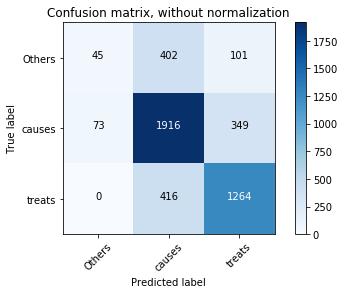

In [75]:
cnf_matrix = confusion_matrix(y_test, y_predicted_nb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      #title='Normalized confusion matrix')

plt.show()